# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [ ]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [ ]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [ ]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [ ]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [ ]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [ ]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18765562,
            "id": 1,
            "last_updated": 1627160383,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 637936352787,
                    "percent_change_1h": 0.541683435986852,
                    "percent_change_24h": 4.53341778717088,
                    "percent_change_7d": 8.27019300736499,
                    "percentage_change_1h": 0.541683435986852,
                    "percentage_change_24h": 4.53341778717088,
                    "percentage_change_7d": 8.27019300736499,
                    "price": 33996.0,
                    "volume_24h": 24140066618
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18765562,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

In [ ]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 116826733,
            "id": 1027,
            "last_updated": 1627160335,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 250899516338,
                    "percent_change_1h": 0.460911418423217,
                    "percent_change_24h": 5.42298525889963,
                    "percent_change_7d": 14.982005882316,
                    "percentage_change_1h": 0.460911418423217,
                    "percentage_change_24h": 5.42298525889963,
                    "percentage_change_7d": 14.982005882316,
                    "price": 2154.99,
                    "volume_24h": 19975459056
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116826733,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [ ]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f'${btc_price:,.2f}')

$33,996.00


In [ ]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f'${eth_price:,.2f}')


$2,154.99


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [ ]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(f'Current value of BTC holding: ${btc_value:,.2f}')

Current value of BTC holding: $40,795.20


In [ ]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(f'Current value of ETH holding: ${eth_value:,.2f}')


Current value of ETH holding: $11,421.45


In [ ]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f'Total crypto wallet value: ${total_crypto_wallet:,.2f}')

Total crypto wallet value: $52,216.65


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [ ]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [ ]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [ ]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1D 
timeframe = '1D'

# This will give you the closing price of the previous trading day
today = dt.datetime.now()
offset = max(1, (today.weekday() + 6) % 7 -3)
timedelta = dt.timedelta(offset)
most_recent = today - timedelta
print(f"Most recent trading day: {most_recent.date()}")

Most recent trading day: 2021-07-23


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [ ]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
prices_most_recent_df = alpaca.get_barset(tickers, timeframe=timeframe, limit=1, end=most_recent).df
# Review the first 5 rows of the Alpaca DataFrame
prices_most_recent_df.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-23 00:00:00-04:00  116.03  116.22  116.03  116.21  4137100  437.53   

                                                           
                            high     low  close    volume  
time                                                       
2021-07-23 00:00:00-04:00  440.3  436.79  439.9  53294703

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [ ]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_most_recent_df['AGG']['close'])

# Print the AGG closing price
print(f'${agg_close_price:,.2f}')

$116.21


In [ ]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_most_recent_df['SPY']['close'])

# Print the SPY closing price
print(f'${spy_close_price:,.2f}')


$439.90


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [ ]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
print(f'${agg_value:,.2f}')

$23,242.00


In [ ]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
print(f'${spy_value:,.2f}')


$48,389.00


In [ ]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f'${total_stocks_bonds:,.2f}')

$71,631.00


In [ ]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f'${total_portfolio:,.2f}')


$123,847.65


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [ ]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]
# Review the Python list savings_data
print(savings_data)    

[52216.647, 71631.0]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [ ]:
# Create a Pandas DataFrame called savings_df 
index = ['crypto', 'stock/bond']
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=index)
# Display the savings_df DataFrame
savings_df

,amount
crypto,52216.647
stock/bond,71631.000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

Crypto:          42.16%
Stocks/Bonds:    57.84%
dtype: object

<AxesSubplot:title={'center':'Total Value of Savings Portfolio'}, ylabel='amount'>

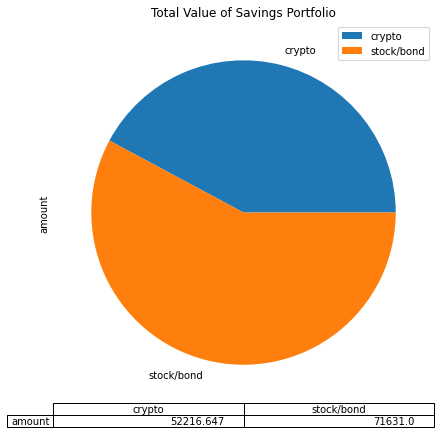

In [ ]:
#crypto_value = savings_df.loc['crypto']
#stock_bond_value = savings_df.loc['stock/bond']
total_value = savings_df.sum()
crypto_string = f"{float(100 * total_crypto_wallet / total_value):.2f}%"
stock_bond_string = f"{float(100 * total_stocks_bonds / total_value):.2f}%"
table_values = {"Crypto:": crypto_string, "Stocks/Bonds:": stock_bond_string}
plot_table_series = pd.Series(table_values)
display(plot_table_series)

# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot(
    kind='pie', 
    y='amount', 
    title='Total Value of Savings Portfolio', 
    figsize=(14,7),
    table=True,
    
)

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [ ]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [ ]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough in your total portfolio to create an emergency fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations on reaching this important financial goal! You have enough in your total portfolio to create an emergency fund.")
else:
    print(f"Oh, no! You need ${emergency_fund_value - total_portfolio:,.2f} more in your total portfolio to create an emergency fund.")

Congratulations! You have enough in your total portfolio to create an emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [ ]:
# Set start and end dates of 10 years back from your current date
end_date = pd.Timestamp.today(tz='America/New_York')
start_date = (end_date - dt.timedelta(days=3653))

# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters have been set in Part 1 of this activity 
days_per_request = 1000
prices_10y_df = alpaca.get_barset(
    symbols=tickers
    , timeframe=timeframe
    , limit=days_per_request
    , end=end_date.isoformat()
).df.sort_index(ascending=False)

# While oldest date is greater than the start date, continue pulling data
while(prices_10y_df.iloc[-1].name > start_date):
    last_date_in_range = prices_10y_df.iloc[-1].name
    day_before_last = last_date_in_range - dt.timedelta(days=1)

    prices = alpaca.get_barset(
        symbols=tickers
        , timeframe=timeframe
        , limit=days_per_request
        , end=day_before_last.isoformat()
    ).df.sort_index(ascending=False)
    prices_10y_df = prices_10y_df.append(prices)
else:
    # Display both the first and last five rows of the DataFrame
    prices_10y_df = prices_10y_df.loc[end_date:start_date].sort_index(ascending=True)
    display(prices_10y_df)

AGG                                       \
                              open      high     low   close     volume   
time                                                                      
2011-07-25 00:00:00-04:00  107.290  107.5600  107.21  107.24  1114331.0   
2011-07-26 00:00:00-04:00  107.350  107.5900  107.31  107.48   799946.0   
2011-07-27 00:00:00-04:00  107.350  107.5100  107.25  107.30   615449.0   
2011-07-28 00:00:00-04:00  107.510  107.6300  107.41  107.52   778231.0   
2011-07-29 00:00:00-04:00  107.800  108.2001  107.70  108.16  1095380.0   
...                            ...       ...     ...     ...        ...   
2021-07-19 00:00:00-04:00  116.390  116.6085  116.35  116.52  6476334.0   
2021-07-20 00:00:00-04:00  116.780  116.8200  116.32  116.39  7229222.0   
2021-07-21 00:00:00-04:00  116.075  116.1500  115.92  116.02  7773071.0   
2021-07-22 00:00:00-04:00  116.030  116.3500  116.03  116.29  6269656.0   
2021-07-23 00:00:00-04:00  116.030  116.2200  116.03  116.21  4137100.0   

                              SPY                                           
                             open      high       low   close       volume  
time                                                                        
2011-07-25 00:00:00-04:00  133.30  134.4900  133.1600  133.84  116741237.0  
2011-07-26 00:00:00-04:00  133.75  133.9600  133.0300  133.33  111374402.0  
2011-07-27 00:00:00-04:00  132.59  132.6000  130.4300  130.61  212152845.0  
2011-07-28 00:00:00-04:00  130.59  131.7700  130.0100  130.22  169973126.0  
2011-07-29 00:00:00-04:00  128.90  130.5500  127.9667  129.32  241904631.0  
...                           ...       ...       ...     ...          ...  
2021-07-19 00:00:00-04:00  426.19  431.4089  421.9700  424.97  127607115.0  
2021-07-20 00:00:00-04:00  425.68  432.4200  424.8300  431.04   87430308.0  
2021-07-21 00:00:00-04:00  432.34  434.7000  431.0111  434.56   54251351.0  
2021-07-22 00:00:00-04:00  434.74  435.7200  433.6900  435.50   41998182.0  
2021-07-23 00:00:00-04:00  437.53  440.3000  436.7900  439.90   53294703.0  

[2517 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
forecast_days = 30 * 252
# The weights should be split 40% to AGG and 60% to SPY.
# Weights list: ['AGG', 'SPY']
weights_list = [.4, .6]
# Run 500 samples.
num_samples = 500
# Create Monte Carlo Simulation Instance
mcs_AGG_40_SPY_60 = MCSimulation(
    prices_10y_df,
    weights=weights_list,
    num_simulation=num_samples,
    num_trading_days=forecast_days,
)
# Review the simulation input data
display(mcs_AGG_40_SPY_60.portfolio_data)

AGG                                       \
                              open      high     low   close     volume   
time                                                                      
2011-07-25 00:00:00-04:00  107.290  107.5600  107.21  107.24  1114331.0   
2011-07-26 00:00:00-04:00  107.350  107.5900  107.31  107.48   799946.0   
2011-07-27 00:00:00-04:00  107.350  107.5100  107.25  107.30   615449.0   
2011-07-28 00:00:00-04:00  107.510  107.6300  107.41  107.52   778231.0   
2011-07-29 00:00:00-04:00  107.800  108.2001  107.70  108.16  1095380.0   
...                            ...       ...     ...     ...        ...   
2021-07-19 00:00:00-04:00  116.390  116.6085  116.35  116.52  6476334.0   
2021-07-20 00:00:00-04:00  116.780  116.8200  116.32  116.39  7229222.0   
2021-07-21 00:00:00-04:00  116.075  116.1500  115.92  116.02  7773071.0   
2021-07-22 00:00:00-04:00  116.030  116.3500  116.03  116.29  6269656.0   
2021-07-23 00:00:00-04:00  116.030  116.2200  116.03  116.21  4137100.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2011-07-25 00:00:00-04:00          NaN  133.30  134.4900  133.1600  133.84   
2011-07-26 00:00:00-04:00     0.002238  133.75  133.9600  133.0300  133.33   
2011-07-27 00:00:00-04:00    -0.001675  132.59  132.6000  130.4300  130.61   
2011-07-28 00:00:00-04:00     0.002050  130.59  131.7700  130.0100  130.22   
2011-07-29 00:00:00-04:00     0.005952  128.90  130.5500  127.9667  129.32   
...                                ...     ...       ...       ...     ...   
2021-07-19 00:00:00-04:00     0.005349  426.19  431.4089  421.9700  424.97   
2021-07-20 00:00:00-04:00    -0.001116  425.68  432.4200  424.8300  431.04   
2021-07-21 00:00:00-04:00    -0.003179  432.34  434.7000  431.0111  434.56   
2021-07-22 00:00:00-04:00     0.002327  434.74  435.7200  433.6900  435.50   
2021-07-23 00:00:00-04:00    -0.000688  437.53  440.3000  436.7900  439.90   

                                                     
                                volume daily_return  
time                                                 
2011-07-25 00:00:00-04:00  116741237.0          NaN  
2011-07-26 00:00:00-04:00  111374402.0    -0.003811  
2011-07-27 00:00:00-04:00  212152845.0    -0.020401  
2011-07-28 00:00:00-04:00  169973126.0    -0.002986  
2011-07-29 00:00:00-04:00  241904631.0    -0.006911  
...                                ...          ...  
2021-07-19 00:00:00-04:00  127607115.0    -0.014859  
2021-07-20 00:00:00-04:00   87430308.0     0.014283  
2021-07-21 00:00:00-04:00   54251351.0     0.008166  
2021-07-22 00:00:00-04:00   41998182.0     0.002163  
2021-07-23 00:00:00-04:00   53294703.0     0.010103  

[2517 rows x 12 columns]

In [ ]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
mcs_AGG_40_SPY_60.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995094,0.998763,1.000602,1.000127,1.002509,0.995899,1.002233,1.004760,0.998764,0.999915,...,1.010398,1.009226,0.996087,1.000153,0.997127,0.996411,1.007293,0.990553,0.992412,1.009839
2,0.994290,1.000352,0.997150,0.996895,1.000445,0.998637,1.001948,0.995795,0.982947,1.001512,...,1.005036,1.003509,1.001552,1.006779,1.003187,0.997789,0.999941,0.993611,0.984555,1.005366
3,0.984589,1.009968,0.992889,0.996455,0.987387,1.017226,1.008369,0.994650,0.981859,1.000717,...,1.006102,1.000609,1.011184,1.000458,1.015028,0.983616,1.007270,1.002295,0.991919,1.008775
4,0.989921,1.009915,0.989354,0.991941,0.984024,1.024739,1.008126,1.002378,0.972117,0.999287,...,1.005545,0.985487,1.014683,1.011735,1.023240,0.978332,1.004776,0.988770,0.992886,1.010404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,4.928535,5.863124,16.926212,6.646142,3.773630,14.489056,5.853353,13.285412,3.834762,17.703879,...,14.098903,4.793975,17.892277,15.211331,13.709356,23.292710,22.599864,44.650367,4.240575,15.614359
7557,4.908766,5.810032,17.060190,6.599120,3.789510,14.517768,5.831844,13.172174,3.789137,17.730924,...,14.156048,4.790887,17.795110,15.246404,13.669727,23.085547,22.456188,44.672332,4.253607,15.719061
7558,4.910064,5.833376,17.116833,6.682322,3.790164,14.505276,5.879038,13.322845,3.823979,17.723646,...,13.965877,4.781686,17.911299,15.212487,13.727670,23.380440,22.217365,44.570893,4.265275,15.619781
7559,4.861035,5.773089,17.034597,6.668564,3.773492,14.458845,5.950349,13.177890,3.830018,17.876833,...,14.149778,4.763689,18.025799,15.173760,13.733285,23.042408,22.192505,44.231037,4.286704,15.840040


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

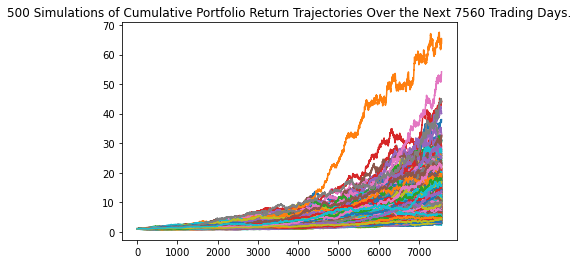

In [ ]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
mcs_AGG_40_SPY_60.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

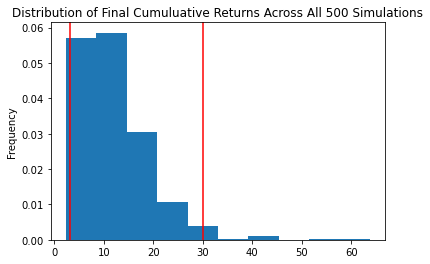

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
mcs_AGG_40_SPY_60.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
mcs_AGG_40_SPY_60_stats = mcs_AGG_40_SPY_60.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
display(mcs_AGG_40_SPY_60_stats)


count           500.000000
mean             12.214917
std               7.357220
min               2.315209
25%               7.047894
50%              10.405379
75%              15.735147
max              63.785300
95% CI Lower      3.257975
95% CI Upper     29.983491
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"SPY ({spy_shares} Shares): ${spy_value:,.2f}")
print(f"AGG ({agg_shares} Shares): ${agg_value:,.2f}")
print(28*'-')
print(f"{'':11s}Total: ${total_stocks_bonds:,.2f}")

SPY (110 Shares): $48,389.00
AGG (200 Shares): $23,242.00
----------------------------
           Total: $71,631.00


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = mcs_AGG_40_SPY_60_stats[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = mcs_AGG_40_SPY_60_stats[9] * total_stocks_bonds

# Print the result of your calculations
print(f"Expected 30 year return on ${total_stocks_bonds:,.2f} is between ${ci_lower_thirty_cumulative_return:,.2f} and ${ci_upper_thirty_cumulative_return:,.2f} with 95% confidence.")


Expected 30 year return on $71,631.00 is between $233,372.03 and $2,147,747.42 with 95% confidence.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
forecast_days = 10 * 252
# The weights should be split 20% to AGG and 80% to SPY.
# Weights list: ['AGG', 'SPY']
weights_list = [.2, .8]
# Run 500 samples.
num_samples = 500
# Create Monte Carlo Simulation Instance
mcs_AGG_20_SPY_80 = MCSimulation(
    prices_10y_df,
    weights=weights_list,
    num_simulation=num_samples,
    num_trading_days=forecast_days,
)
# Review the simulation input data
display(mcs_AGG_20_SPY_80.portfolio_data)

AGG                                       \
                              open      high     low   close     volume   
time                                                                      
2011-07-25 00:00:00-04:00  107.290  107.5600  107.21  107.24  1114331.0   
2011-07-26 00:00:00-04:00  107.350  107.5900  107.31  107.48   799946.0   
2011-07-27 00:00:00-04:00  107.350  107.5100  107.25  107.30   615449.0   
2011-07-28 00:00:00-04:00  107.510  107.6300  107.41  107.52   778231.0   
2011-07-29 00:00:00-04:00  107.800  108.2001  107.70  108.16  1095380.0   
...                            ...       ...     ...     ...        ...   
2021-07-19 00:00:00-04:00  116.390  116.6085  116.35  116.52  6476334.0   
2021-07-20 00:00:00-04:00  116.780  116.8200  116.32  116.39  7229222.0   
2021-07-21 00:00:00-04:00  116.075  116.1500  115.92  116.02  7773071.0   
2021-07-22 00:00:00-04:00  116.030  116.3500  116.03  116.29  6269656.0   
2021-07-23 00:00:00-04:00  116.030  116.2200  116.03  116.21  4137100.0   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2011-07-25 00:00:00-04:00          NaN  133.30  134.4900  133.1600  133.84   
2011-07-26 00:00:00-04:00     0.002238  133.75  133.9600  133.0300  133.33   
2011-07-27 00:00:00-04:00    -0.001675  132.59  132.6000  130.4300  130.61   
2011-07-28 00:00:00-04:00     0.002050  130.59  131.7700  130.0100  130.22   
2011-07-29 00:00:00-04:00     0.005952  128.90  130.5500  127.9667  129.32   
...                                ...     ...       ...       ...     ...   
2021-07-19 00:00:00-04:00     0.005349  426.19  431.4089  421.9700  424.97   
2021-07-20 00:00:00-04:00    -0.001116  425.68  432.4200  424.8300  431.04   
2021-07-21 00:00:00-04:00    -0.003179  432.34  434.7000  431.0111  434.56   
2021-07-22 00:00:00-04:00     0.002327  434.74  435.7200  433.6900  435.50   
2021-07-23 00:00:00-04:00    -0.000688  437.53  440.3000  436.7900  439.90   

                                                     
                                volume daily_return  
time                                                 
2011-07-25 00:00:00-04:00  116741237.0          NaN  
2011-07-26 00:00:00-04:00  111374402.0    -0.003811  
2011-07-27 00:00:00-04:00  212152845.0    -0.020401  
2011-07-28 00:00:00-04:00  169973126.0    -0.002986  
2011-07-29 00:00:00-04:00  241904631.0    -0.006911  
...                                ...          ...  
2021-07-19 00:00:00-04:00  127607115.0    -0.014859  
2021-07-20 00:00:00-04:00   87430308.0     0.014283  
2021-07-21 00:00:00-04:00   54251351.0     0.008166  
2021-07-22 00:00:00-04:00   41998182.0     0.002163  
2021-07-23 00:00:00-04:00   53294703.0     0.010103  

[2517 rows x 12 columns]

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
mcs_AGG_20_SPY_80.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995698,0.996070,1.008723,1.008324,0.985946,1.004050,1.007817,1.005203,0.998472,1.003833,...,1.000396,0.992863,1.003964,1.005734,0.999815,1.008250,1.015398,1.000181,0.980114,1.008958
2,0.993570,0.995193,1.011861,1.005237,0.978822,1.002595,1.017406,1.013585,0.991198,1.020087,...,0.998896,0.995597,0.988774,1.017834,1.018836,0.991583,0.999208,1.012146,0.965951,1.002834
3,0.992425,1.007532,1.006490,1.004744,0.975527,0.995662,1.011888,1.014495,0.971944,1.032589,...,1.006316,0.987154,0.973244,1.020304,1.015139,1.004414,1.003372,1.012135,0.964512,1.003156
4,1.001448,0.998902,1.004714,1.004534,0.985502,1.003604,1.023140,1.013929,0.966059,1.030007,...,1.010938,1.001162,0.976380,1.011284,1.015572,1.004431,1.004858,1.015660,0.970768,1.016917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.983403,2.470714,2.167584,2.891650,3.641105,6.618194,5.286581,2.929583,4.755772,2.365430,...,5.718199,2.286515,1.524686,1.223633,1.309974,3.355414,4.718457,2.271624,4.125912,2.569354
2517,4.004384,2.514010,2.129487,2.901441,3.630689,6.745946,5.315470,2.962201,4.880926,2.351712,...,5.796358,2.278469,1.490297,1.194956,1.296630,3.378679,4.728676,2.265976,4.113246,2.577544
2518,3.996300,2.497008,2.115676,2.933452,3.621876,6.786328,5.316473,2.985540,4.847167,2.348959,...,5.815157,2.314932,1.510569,1.200453,1.305281,3.385236,4.718865,2.279362,4.127359,2.587452
2519,3.986370,2.489240,2.132021,2.939975,3.650739,6.805663,5.346032,2.942044,4.868408,2.353968,...,5.893840,2.325672,1.516968,1.196323,1.294434,3.413252,4.687175,2.261499,4.138135,2.606487


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

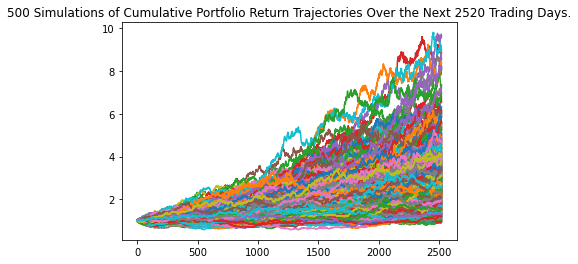

In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
mcs_AGG_20_SPY_80.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

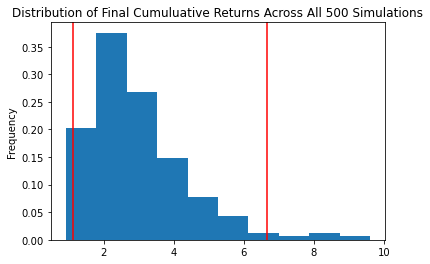

In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
mcs_AGG_20_SPY_80.plot_distribution()

In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
mcs_AGG_20_SPY_80_stats = mcs_AGG_20_SPY_80.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(mcs_AGG_20_SPY_80_stats)

count           500.000000
mean              2.980220
std               1.425856
min               0.917475
25%               2.034702
50%               2.651245
75%               3.600644
max               9.602458
95% CI Lower      1.118920
95% CI Upper      6.647525
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"The current balance of the Stocks/Bonds Portfolio is ${total_stocks_bonds:.2f}")


The current balance of the Stocks/Bonds Portfolio is $70196.10


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = round(ten_year_sim_stat[8]*total_portfolio,2)
ci_upper_ten_cumulative_return = round(ten_year_sim_stat[9]*total_portfolio,2)


# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of ${total_portfolio:.2f} in the retirement portfolio"
      f" over the next {num_years_10} years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.")


There is a 95% chance that an initial investment of $131100.82 in the retirement portfolio over the next 10 years will end within in the range of $164909.63 and $559304.66.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

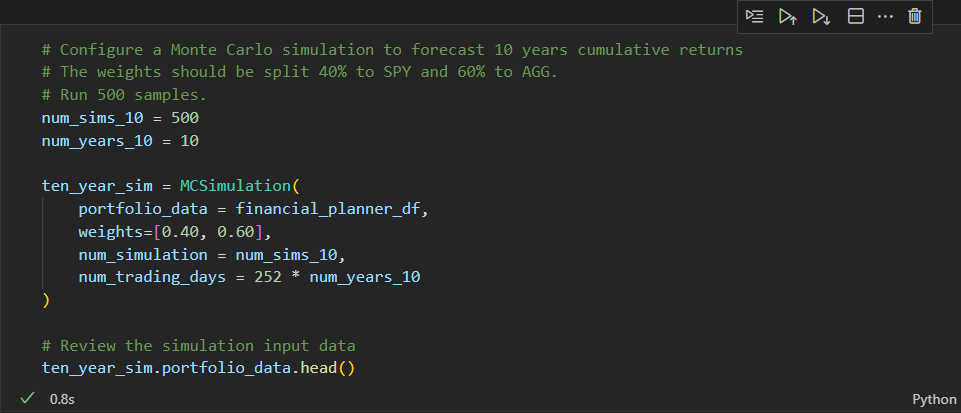

In [ ]:
from IPython import display
display.Image('./Images/60_weight_agg_1.png')
# Code using .4 SPY and .6 AGG split

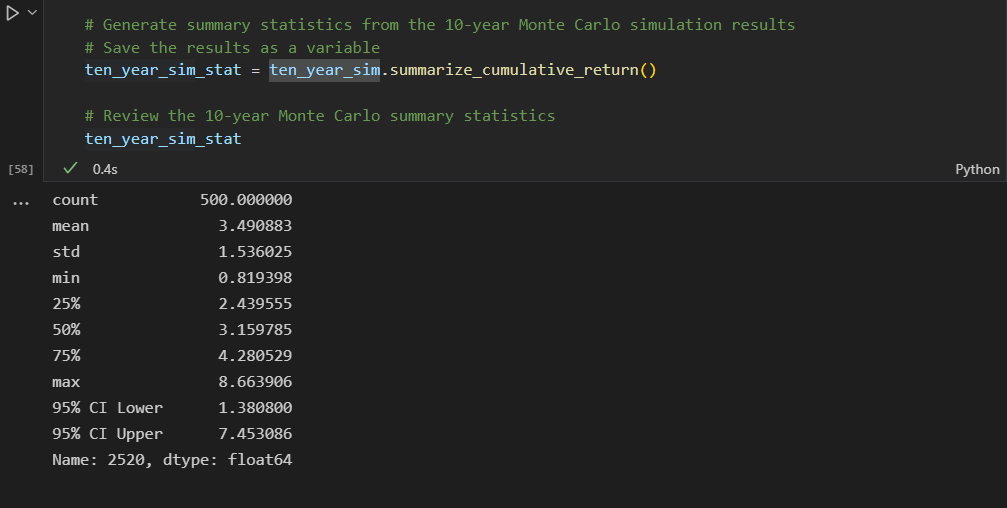

In [ ]:
display.Image('./Images/60_weight_agg_2.png')
# Code showing a higher std dev with .6 weight on AGG

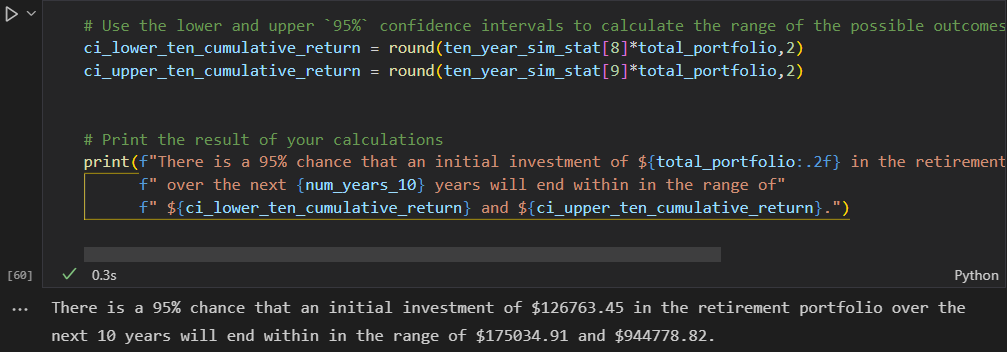

In [ ]:
display.Image('./Images/60_weight_agg_3.png')
# code showing results of higher std dev with higher weight on bonds